Please **submit this Jupyter notebook through Canvas** no later than **Monday November 12, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Tharangni H Sivaji (11611065)

In [1]:
import sys
import matplotlib
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
sys.float_info.epsilon

2.220446049250313e-16

-----
# Exercise 1

## (a)
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

Singular matrix $\Rightarrow$ det(A) = 0. Therefore, solving for det(A) = 0,

$ 1(-3 - \alpha) + (-3 - 0) + \alpha(2\alpha - 0) = 0 $

$ 2\alpha^2 - \alpha -6 = 0 $

$ 2\alpha(\alpha-2) + 3(\alpha-2) = 0 $

$ \Rightarrow \alpha = 2, \frac{-3}{2} $

In [3]:
A = np.matrix([[1, -1, -3/2], [2, 2, 1], [0, -3/2, -3/2]])

In [4]:
np.linalg.det(A)

0.0

---

## (b)
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

Representing the given set of equations as matrix A, we have $A = \begin{bmatrix} 2 & 1 & 1 \\ 2 & -1 & 3 \\ -2 & \alpha & 3 \end{bmatrix}$ and $b = \begin{bmatrix} 3 \\ 5 \\ 1 \end{bmatrix}$

Singular matrices are invertible and have an infinite number of solutions. Moreover, singular matrices have a large condition number.

$\therefore \text{det}(A) = 0 \Rightarrow 2(-3 - 3\alpha) - 1(6 + 6) + 1(2\alpha - 2) = 0 $

$ -20 - 4\alpha = 0 $

$ \alpha = -5 $

$ \therefore A =  \begin{bmatrix} 2 & 1 & 1 \\ 2 & -1 & 3 \\ -2 & \textbf{-5} & 3 \end{bmatrix}$

In [5]:
A = np.matrix([[2, 1, 1], [2, -1, 3], [-2, -5, 3]])
b = np.matrix([[3], [5], [1]])

In [6]:
np.linalg.cond(A, p = 1) #1-norm has an infinite condition number for singular matrices

inf

In [7]:
# checking if the matrix is invertible or not. 
# If a matrix is not invertible, then there are zero or infinite solutions
try:
    print(np.linalg.det(A))
    print(np.linalg.solve(A, b)) # singular matrices don't have a unique solution. so this throws an error
    print(np.linalg.inv(A)) # singular matrices don't have an inverse. therefore, this also results in an error
except:
    print(np.linalg.det(A))
    print("LinAlgError: Singular Matrix")

0.0
0.0
LinAlgError: Singular Matrix


## (c)
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

Columns are from: k = 1, ..., n and rows are from: i = 1, ..., n

1. Property of positivity

    We need to prove that:
    
    $||A||_* > 0$ if $A \neq 0$ ```<or>``` $||A||_* = 0$ if $A = 0$
    
    $\Rightarrow ||A||_* = 0$, if max(set of positive numbers) = 0
    
    $\Rightarrow ||A_k||_2 = 0, \forall k$
    
    $\therefore \max_k ||A_k y||_2 = 0, \forall y \in \mathbb{R}$
    
    $\Rightarrow ||Ay||_* = 0$
    
    Hence proved.
    

2. Property of homogenity

    We need to prove that:
    
    $||\alpha A||_* = |\alpha| \cdot ||A||_*$, for any scalar $\alpha$
    
    We know that,
    
    $||\alpha A||_* = \max_k ||\alpha A_k||_2$ (from the definition)
    
    $\hspace{2.4em} = \max_k \sqrt{\alpha^2 \sum_{i} A_{ik}^2}$

    $\hspace{2.4em} = |\alpha| \max_k \sqrt{\sum_{i} A_{ik}^2}$
    
    $\hspace{2.4em} = |\alpha| \max_k ||A_k||_2$
    
    $\hspace{2.4em} = |\alpha| \cdot ||A||_*$
    
    Hence proved.
    


3. Triangle inequality
    
    We need to prove that:
    
    $||A + B||_* \leq ||A||_* + ||B||_*$
    
    We know that,
    
     $||A + B||_* = \max_k ||(A + B)_k||_2$ (from the definition)
     
     $\hspace{3.4em} = \max_k \sqrt{\sum_i (A + B)_{ik}^2} $
     
     From the triangle inequality for real numbers and $ x^2 = |x|^2, \forall x \in \mathbb{R}$ we get:
     
     $\hspace{3.4em} \leq \max_k \sqrt{\sum_i (A)_{ik}^2 + \sum_i (B)_{ik}^2 + \sum_{i} 2 \cdot |A|_{ik} \cdot |B|_{ik}} $
     
     $\hspace{3.4em} \leq \max_k \sqrt{\sum_i |A|_{ik}^2 + \sum_i |B|_{ik}^2 + \sum_{i} 2 \cdot |A|_{ik} \cdot |B|_{ik}} $
     
     $\hspace{3.4em} \leq \max_k \sqrt{\sum_i (|A|_{ik} + |B|_{ik})^2 } $
     
     $\hspace{3.4em} \leq \max_k (|| (|A|_{k} + |B|_{k})||_2) $
     
     $\hspace{3.4em} \leq \max_k || A_{k} ||_2 + \max_k  || B_{k}||_2 $
     
     $\hspace{3.4em} \leq ||A||_* + ||B||_* $
     
     Hence proved.
     

----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a)
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [8]:
A = np.matrix([[2, 4, -2], [4, 9, -3], [-2, -1, 7]])
b = np.matrix([[2], [8], [10]])

In [9]:
def lu_inv(A):
    # inverse can be computed only for square matrices
    assert A.shape[0] == A.shape[1], "Input is not a square matrix"
    
    # calculate n, L, U for A
    # L matrix undergoes permutation to enforce larger pivots which produce smaller multipliers and hence smaller errors
    n = A.shape[0]    
    L, U = la.lu(A, permute_l = True)
    A_inv, d, temp = np.eye(n, dtype = float), np.eye(n, dtype = float), np.eye(n, dtype = float)
    
    for i in range(n):
        # solve the lower tri sys by fwd substitution
        d[:, i] = la.solve(L, temp[:, i])

        # solve the upper tri sys by bkwd substitution 
        A_inv[:, i] = la.solve(U, d[:, i])
        
    return (A_inv)

## (b)
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?

The complexity of inversion using LU factorization is O(n$^2$).

## (c)
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

In [10]:
'''
N = 1 to N (range) of matrix sizes
cond_matrix[:, 0] = 2-condition number of Hn
cond_matrix[:, 1] = inf-condition number of Hn
cond_matrix[:, 2] = 2-condition number of H_inv (computed inverse)
cond_matrix[:, 3] = inf-condition number of H_inv
cond_matrix[:, 4] = 2-condition number of H_inv_true (true inverse from library)
cond_matrix[:, 5] = inf-condition number of H_inv_true
inf_norm_diff = progress of inf-norm of difference between H_inv and H_inv_true
'''

N = 30
inf_norm_diff, cond_matrix = np.zeros((N,1)), np.zeros((N,6))

In [11]:
def hilbert_compare(n):
    
    H = la.hilbert(n)
    H_inv_true = la.invhilbert(n, exact=False)
    H_inv = lu_inv(H)
    
#     inf_norm = np.linalg.norm(H_inv, np.inf, keepdims= True)
#     inf_norm_true = np.linalg.norm(H_inv_true, np.inf, keepdims= True)
    
    return H_inv, H_inv_true, H

In [12]:
t = np.arange(1, N+1, 1)
hilbert = [hilbert_compare(n) for n in t]
hilbert = np.array(hilbert)

/home/tharangni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.916007e-17
  app.launch_new_instance()
/home/tharangni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.849515e-18
  app.launch_new_instance()
/home/tharangni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.032504e-18
  app.launch_new_instance()
/home/tharangni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.094729e-18
  ap

In [13]:
for i in range(N):
    inf_norm_diff[i] = np.linalg.norm(hilbert[i][0] - hilbert[i][1], np.inf)
    
    cond_matrix[i][0] = np.linalg.cond(hilbert[i][2], p = 2)
    cond_matrix[i][1] = np.linalg.cond(hilbert[i][2], p = np.inf)
    cond_matrix[i][2] = np.linalg.cond(hilbert[i][0], p = 2)
    cond_matrix[i][3] = np.linalg.cond(hilbert[i][0], p = np.inf)
    cond_matrix[i][4] = np.linalg.cond(hilbert[i][1], p = 2)
    cond_matrix[i][5] = np.linalg.cond(hilbert[i][1], p = np.inf)

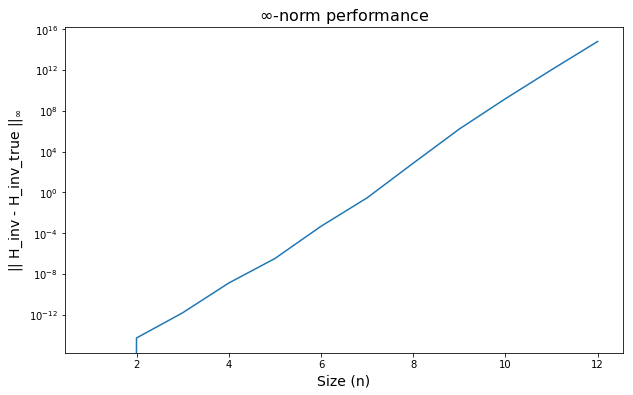

In [14]:
plt.figure(figsize = (10, 6))
plt.semilogy(t[0:12], inf_norm_diff[0:12])
plt.xlabel("Size (n)", fontsize = 14)
plt.ylabel(r'|| H_inv - H_inv_true ||$ _{\infty}$',  fontsize = 14)
plt.title(r'${\infty}$-norm performance',  fontsize = 16)
plt.show()

## (d)
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

In [15]:
plt.rcParams["figure.figsize"] = (16, 5)

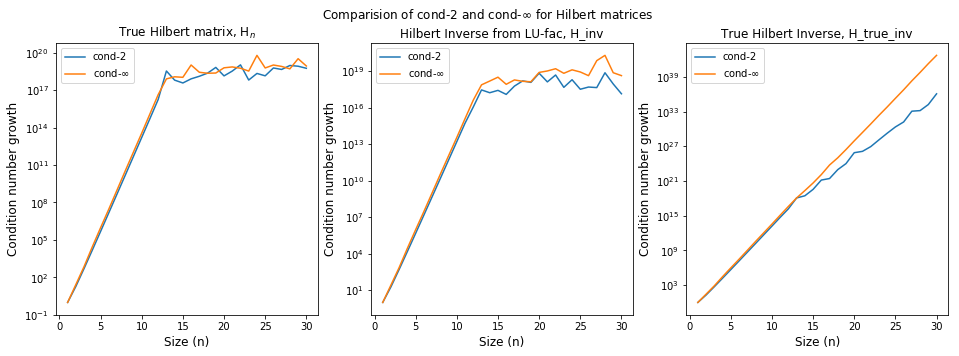

In [16]:
fig, ax = plt.subplots(1, 3, True)

ax[0].semilogy(t, cond_matrix[:, 0], label = "cond-2")
ax[0].semilogy(t, cond_matrix[:, 1], label = r'cond-${\infty}$')
ax[0].set_xlabel("Size (n)", fontsize = 12)
ax[0].set_ylabel(r'Condition number growth',  fontsize = 12)
ax[0].set_title(r'True Hilbert matrix, H$_n$')
ax[0].legend()

ax[1].semilogy(t, cond_matrix[:, 2], label = "cond-2")
ax[1].semilogy(t, cond_matrix[:, 3], label = r'cond-${\infty}$')
ax[1].set_xlabel("Size (n)", fontsize = 12)
ax[1].set_ylabel(r'Condition number growth',  fontsize = 12)
ax[1].set_title(r'Hilbert Inverse from LU-fac, H_inv')
ax[1].legend()

ax[2].semilogy(t, cond_matrix[:, 4], label = "cond-2")
ax[2].semilogy(t, cond_matrix[:, 5], label = r'cond-${\infty}$')
ax[2].set_xlabel("Size (n)", fontsize = 12)
ax[2].set_ylabel(r'Condition number growth',  fontsize = 12)
ax[2].set_title(r'True Hilbert Inverse, H_true_inv')
ax[2].legend()

fig.suptitle(r'Comparision of cond-2 and cond-${\infty}$ for Hilbert matrices')
plt.show()

From the above graph, it can be observed that the cond-2 and cond-$\infty$ numbers grow in a similar way for Hilbert matrix, $H_n$ with inf-cond always performing slightly worse (otherwise negligible difference) than 2-cond till a certain threshold at $n \approx 14$. At n > 14, both the condition numbers stop increasiing linearly and display an erratic behaviour.

It can also be seen from these 3 graphs that the comparision between condition number growth in 2-cond and inf-cond remains the **same across** Hn, H_inv and H_true_inv till $n \approx 14$. This is anticipated due to the definition of condition number given by: 
$\begin{align*} \text{cond}(A) &= ||A|| \cdot ||A||^{-1}\end{align*}$.

At n > 14, there is an erratic and unstable growth in the condition number. One reason for this could be because after n > 14, some entries in the inverse exceed the upper limit of 64 bit integers.  It could also possibly be that from this point, `scipy.linalg.invhilbert(h)` involves round-off errors and `np.linalg.cond(..., p = 2 or inf)` begins to loose robustness. This could also be the reason why the condition number does not continue to grow after N=14 for Hn and H_inv.

However, the condition number growth for H_true_inv is quiet different from the rest. It is observed from comparing values between H_inv and H_true_inv that the inbuilt inverse function round-offs its values. Thereby, as n increases this "rounding" also increases linearly (exponentially). 